# Data assembly
Read the individual files for 2015, merge them and then save them as a csv

In [1]:
import pandas as pd

filenames = ['2015_01-07.csv',
             '2015_08.csv',
             '2015_09.csv',
             '2015_10.csv',
             '2015_11-12.csv']

# load the individual files
dat2015 = pd.read_csv(filenames[0])
dat2015_08 = pd.read_csv(filenames[1])
dat2015_09 = pd.read_csv(filenames[2])
dat2015_10 = pd.read_csv(filenames[3])
dat2015_1112 = pd.read_csv(filenames[4])

# add the other files
dat2015 = dat2015.append(dat2015_08).reset_index(drop=True)
dat2015 = dat2015.append(dat2015_09).reset_index(drop=True)
dat2015 = dat2015.append(dat2015_10).reset_index(drop=True)
dat2015 = dat2015.append(dat2015_1112).reset_index(drop=True)

# convert hour column to datetime
dat2015.hour = pd.to_datetime(dat2015.hour)
dat2015.index = dat2015.hour

# save the whole 2015 data set
dat2015.to_csv('2015_complete.csv', index=False)

# remove parts that are not needed from memory
del dat2015_08
del dat2015_09
del dat2015_10
del dat2015_1112

# Subsetting
Calculate the ratio for English and German

In [2]:
# subsetting
dat_de = dat2015.query('language == "de"')
dat_en = dat2015.query('language == "en"')

# calculate time series
ts_en_mw = dat_en.query('type == "mw"').visits
ts_en_all = dat_en.groupby('hour')['visits'].sum()
ts_en = ts_en_mw / ts_en_all
ts_de_mw = dat_de.query('type == "mw"').visits
ts_de_all = dat_de.groupby('hour')['visits'].sum()
ts_de = ts_de_mw / ts_de_all


# Some pretty graphs
Graph some data for English and German (more concentrated in one time zone)

Graph 1: The development of the ratio over time

Graph 2: A multigraph with ratios for different days of the week and hours of the day

In [3]:
# aggregate data to weeks
en_weekdays = ts_en.groupby(lambda x: x.weekday_name).mean()
en_weekdays_err = ts_en.groupby(lambda x: x.weekday_name).std()
# put weekdays in proper order
en_weekdays = en_weekdays[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
en_weekdays_err = en_weekdays_err[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]


de_weekdays = ts_de.groupby(lambda x: x.weekday_name).mean()
de_weekdays_err = ts_de.groupby(lambda x: x.weekday_name).std()
de_weekdays = de_weekdays[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
de_weekdays_err = de_weekdays_err[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]



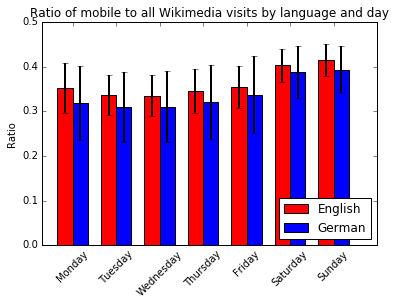

In [4]:
# barchart by day of the week
# following: http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig= plt.figure()
ax = plt.subplot(111)

ind = np.arange(7)
width = .35

rects1 = ax.bar(ind, en_weekdays, width, color='red',
                yerr=en_weekdays_err,
                error_kw=dict(elinewidth=2, ecolor='black'))

rects2 = ax.bar(ind+width, de_weekdays, width, color='blue',
                yerr=de_weekdays_err,
                error_kw=dict(elinewidth=2, ecolor='black'))

# axes and labels
ax.set_xlim(-width, 7+width)
ax.set_ylim(0, .5)
ax.set_ylabel('Ratio')
ax.set_title('Ratio of mobile to all Wikimedia visits by language and day')
ax.set_xticks(ind + width)
xNames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtickNames = ax.set_xticklabels(xNames)
plt.setp(xtickNames, rotation=45, fontsize=10)

# legend
ax.legend((rects1[0], rects2[0]), ('English', 'German'), loc='lower right')

plt.savefig('dailyplot.png', dpi=1000, bbox_inches='tight', pad_inches=.2)


In [5]:
# aggregate data to hours of the day
en_hours = ts_en.groupby(lambda x: x.hour).mean()
en_hours_err = ts_en.groupby(lambda x: x.hour).std()


de_hours = ts_de.groupby(lambda x: x.hour).mean()
de_hours_err = ts_de.groupby(lambda x: x.hour).std()



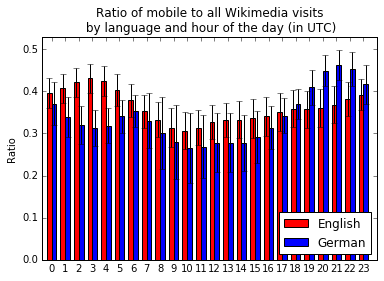

In [6]:
# plot hourly data
fig= plt.figure()
ax = plt.subplot(111)

ind = np.arange(24)
width = .35

rects1 = ax.bar(ind, en_hours, width, color='red',
                yerr=en_hours_err,
                error_kw=dict(elinewidth=1, ecolor='black'))

rects2 = ax.bar(ind+width, de_hours, width, color='blue',
                yerr=de_hours_err,
                error_kw=dict(elinewidth=1, ecolor='black'))

# axes and labels
ax.set_xlim(-width, 24+width)
ax.set_ylim(0, .53)
ax.set_ylabel('Ratio')
ax.set_title('Ratio of mobile to all Wikimedia visits\n by language and hour of the day (in UTC)')
ax.set_xticks(ind + width)
xNames = en_hours.index
xtickNames = ax.set_xticklabels(xNames)
# plt.setp(xtickNames, rotation=45, fontsize=10)

# legend
ax.legend((rects1[0], rects2[0]), ('English', 'German'), loc='lower right')

plt.savefig('hourlyplot.png', dpi=1000, bbox_inches='tight', pad_inches=.2)